In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [3]:
df_AmesHousing = pd.read_csv('AmesHousing.csv')
df_AmesHousing.head()

# Noticed that there are a lot of NaN/Null values.

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [8]:
df_AmesHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [9]:
df_AmesHousing.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


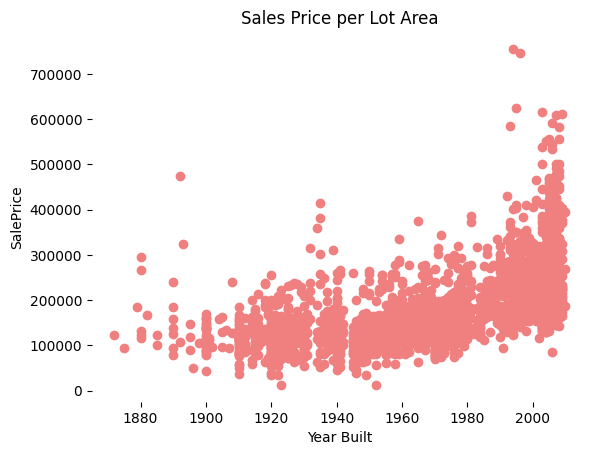

In [13]:
# Look at Lot Area and SalePrice
# SalePrice should be the Y value.

plt.scatter(df_AmesHousing['Year Built'], df_AmesHousing['SalePrice'], color = 'lightcoral')
plt.title('Sales Price per Lot Area')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.box(False)
plt.show()

In [25]:
# Test train, split data into 80/20 split
# X = year built - independent
# Y = SalePrice - dependent
X = df_AmesHousing.iloc[:, :1]
y = df_AmesHousing.iloc[:, 1:]

## How to tell if something is categorical value or not? 
- If it is categorical, then it needs to be processed differently than pure float/numerical values.
  - 
- Below is an example where one of the values (year built?) is a categorical value, therefore needs to be concat and drop null values.

From chatgpt:
# Get all categorical columns (columns with dtype 'object' or 'category')
categorical_columns = df_AmesHousing.select_dtypes(include=['object', 'category']).columns

# Display the list of categorical columns
print(categorical_columns)

In [50]:
categorical_columns = df_AmesHousing.select_dtypes(include=['object', 'category']).columns

categorical_df = df_AmesHousing[categorical_columns]

print(categorical_df)


     MS Zoning Street Alley Lot Shape Land Contour Utilities Lot Config  \
0           RL   Pave   NaN       IR1          Lvl    AllPub     Corner   
1           RH   Pave   NaN       Reg          Lvl    AllPub     Inside   
2           RL   Pave   NaN       IR1          Lvl    AllPub     Corner   
3           RL   Pave   NaN       Reg          Lvl    AllPub     Corner   
4           RL   Pave   NaN       IR1          Lvl    AllPub     Inside   
...        ...    ...   ...       ...          ...       ...        ...   
2925        RL   Pave   NaN       IR1          Lvl    AllPub    CulDSac   
2926        RL   Pave   NaN       IR1          Low    AllPub     Inside   
2927        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2928        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   
2929        RL   Pave   NaN       Reg          Lvl    AllPub     Inside   

     Land Slope Neighborhood Condition 1  ... Garage Type Garage Finish  \
0           Gtl        N

In [54]:
# Got help from chatgpt for a function to check whether a column is categorical or not.
from pandas.api.types import is_categorical_dtype, is_object_dtype
# Function to check if a column is categorical
def is_column_categorical(df, column_name):
    return is_categorical_dtype(df[column_name]) or is_object_dtype(df[column_name])

# Example usage
column_name = 'Year Built'  # Replace with your column name
if is_column_categorical(df_AmesHousing, column_name):
    print(f"The column '{column_name}' is categorical.")
else:
    print(f"The column '{column_name}' is not categorical.")

The column 'Year Built' is not categorical.


C:\Users\Alerc\AppData\Local\Temp\ipykernel_20396\1481761492.py:5: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return is_categorical_dtype(df[column_name]) or is_object_dtype(df[column_name])


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df_AmesHousing is your dataset
# Selecting the relevant columns: 'Year Built' and 'SalePrice'
X = df_AmesHousing[['Year Built']]
y = df_AmesHousing['SalePrice']

# Splitting the data into training and testing sets with 80/20 split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop rows with NaN in y_train (SalePrice)
train_data = pd.concat([X_train, y_train], axis=1)
train_data = train_data.dropna(subset=['SalePrice'])  # Drop rows where SalePrice is NaN

# Split back into X_train and y_train
X_train = train_data.drop(columns=['SalePrice'])  # Keep "Year Built" as X_train
y_train = train_data['SalePrice']  # Keep "SalePrice" as y_train

# Initialize and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)



LinearRegression()

In [43]:
Y_pred_test = regressor.predict(X_test)
Y_pred_train = regressor.predict(X_train)

In [55]:
# For fun, got help from chatgpt to implement RMSE, MAE etc to see the numerical values of the difference between the models.
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get predictions on both the training and test sets
Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(y_train, Y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, Y_pred_train)
r2_train = r2_score(y_train, Y_pred_train)

# Calculate evaluation metrics for the test set
mse_test = mean_squared_error(y_test, Y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, Y_pred_test)
r2_test = r2_score(y_test, Y_pred_test)

# Print the results
print("Training Set Evaluation:")
print(f"RMSE: {rmse_train}, MAE: {mae_train}, R²: {r2_train}")

print("\nTest Set Evaluation:")
print(f"RMSE: {rmse_test}, MAE: {mae_test}, R²: {r2_test}")


Training Set Evaluation:
RMSE: 64630.12248303023, MAE: 45754.7399212836, R²: 0.29747124695636884

Test Set Evaluation:
RMSE: 72693.44688163356, MAE: 49306.26723003996, R²: 0.34090356988554005


RMSE indicates typical error magnitude in the predictions.

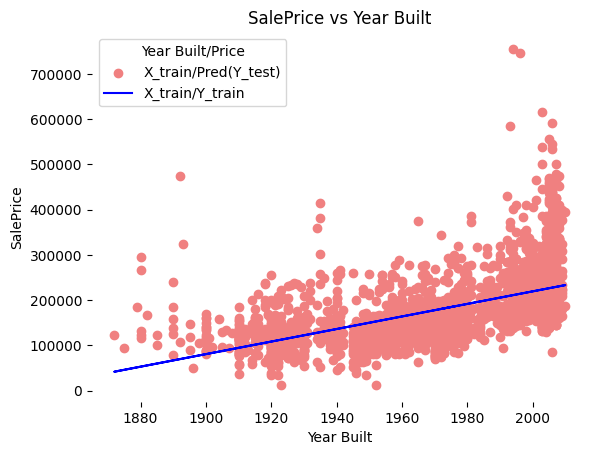

In [45]:
# Plot the prediction on training set.
plt.scatter(X_train, y_train, color ='lightcoral')
plt.plot(X_train, Y_pred_train, color='blue')
plt.title('SalePrice vs Year Built')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.legend(['X_train/Pred(Y_test)', 'X_train/Y_train'], title = 'Year Built/Price', loc = 'best', facecolor='white')
plt.box(False)
plt.show()

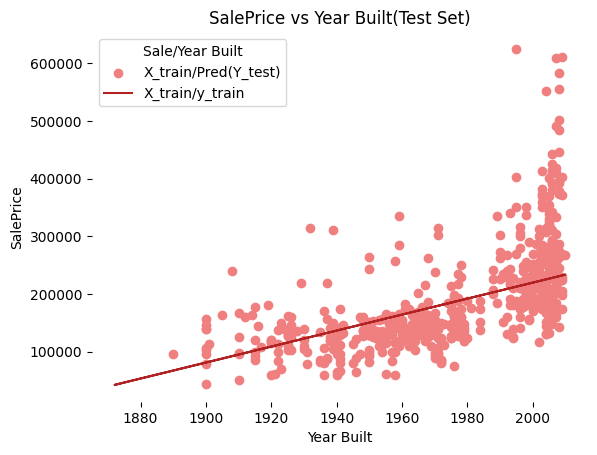

In [46]:
# Plot test set data vs its prediction.
plt.scatter(X_test, y_test, color='lightcoral')
plt.plot(X_train, Y_pred_train, color ='firebrick')
plt.title('SalePrice vs Year Built(Test Set)')
plt.xlabel('Year Built')
plt.ylabel('SalePrice')
plt.legend(['X_train/Pred(Y_test)', 'X_train/y_train'], title = 'Sale/Year Built')
plt.box(False)
plt.show()

There is a rather substantial error for this dataset and X & Y chosen, and it looks like the model would work better with the polynomial model instead of linear regression.
It is clear that we are missing a relationship that also influences the price of a house, which makes sense as how big the house is would also impact price, as well as its location. If it's in the middle of nowhere, then it's usually not desirable and thus lower price for the house.

In [47]:
# coefficient: for each year a house is built later, the predicted sale price is increased by the coefficient number,
# in this case 1386 dollars.
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [1386.37904367]
Intercept: -2553287.16113109
